In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('advertising.csv')

In [3]:
df.shape

(200, 5)

In [4]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df=df.drop(columns=['Unnamed: 0'])

In [6]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [7]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [8]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

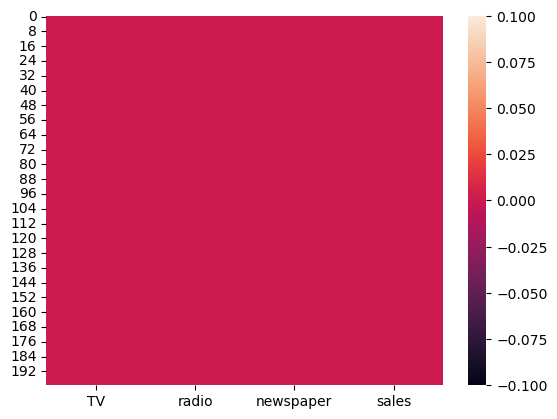

In [9]:
sns.heatmap(df.isnull())

In [10]:
df.duplicated().sum()

0

<AxesSubplot:xlabel='TV', ylabel='sales'>

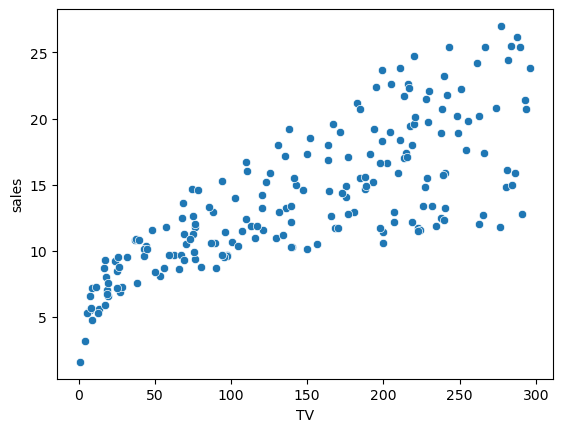

In [11]:
sns.scatterplot(data=df, x='TV', y='sales')

<AxesSubplot:xlabel='radio', ylabel='sales'>

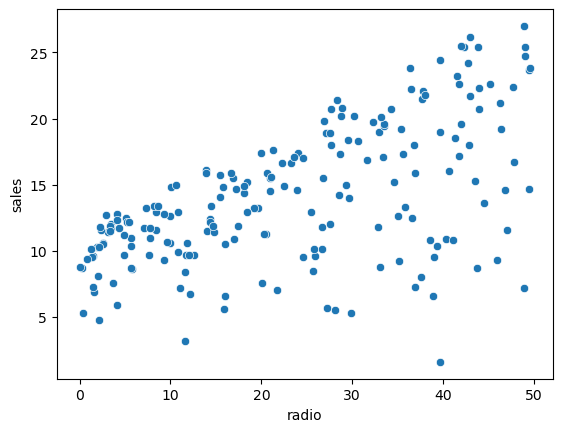

In [12]:
sns.scatterplot(data=df, x='radio', y='sales')

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

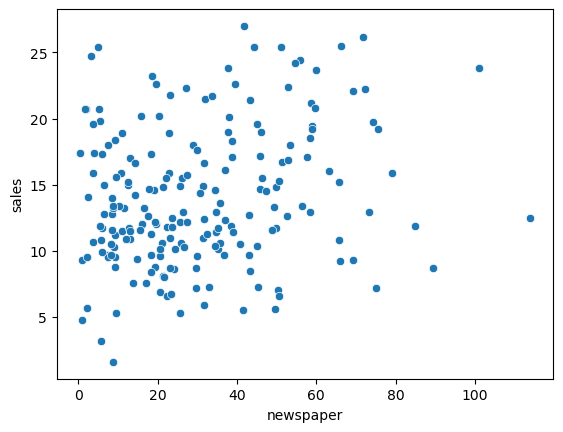

In [13]:
sns.scatterplot(data=df, x='newspaper', y='sales')

In [14]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

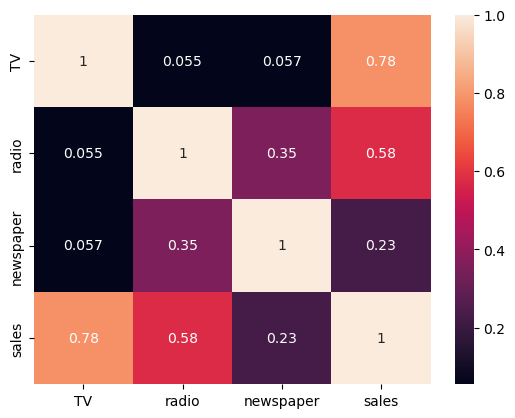

In [15]:
sns.heatmap(df.corr(), annot=True)

In [16]:
X = df[['TV', 'radio']] #input 2D

In [17]:
Y = df['sales'] #input 1D

In [18]:
X.shape #input means features

(200, 2)

In [19]:
Y.shape

(200,)

In [20]:
X.head()

,TV,radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8


In [21]:
# train test split: inbuilt function: train_test_split()
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3, random_state=1)

In [23]:
X_train.shape, Y_train.shape

((140, 2), (140,))

In [24]:
X_test.shape, Y_test.shape

((60, 2), (60,))

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
ss = StandardScaler()

In [27]:
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [28]:
type(X_test), type(X_train)

(numpy.ndarray, numpy.ndarray)

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lr = LinearRegression()

In [31]:
lr.fit(X_train, Y_train)

LinearRegression()

In [32]:
lr.coef_ #attribute showing 2 slopes

array([4.06756287, 2.70136813])

In [33]:
lr.intercept_

13.79142857142857

In [34]:
Y_predict = lr.predict(X_test) 

In [35]:
RSS= ((Y_test - Y_predict)**2).sum()
MSE=RSS/Y_predict.size
print('RSS', RSS)
print('MSE', MSE)

RSS 114.88230173833078
MSE 1.9147050289721796


In [36]:
from sklearn.metrics import mean_squared_error

In [37]:
mean_squared_error(Y_test, Y_predict)

1.9147050289721796

In [38]:
(lr.score(X_test, Y_test)* 100).round(3)  #testing score

92.303

In [39]:
(lr.score(X_train, Y_train)* 100).round(3) #training score

88.496

In [40]:
'''
# training score >testing score  
#but in this case training score <testing score means model is under fit 
#means it is not a good model 
#here training score= 0.88 means 88%
#and testing score=0.92 means 92% 
#clearly training score<testing score 
#88%<92%  means model is underfit
#if our model will be underfit then apply polynomial linear regression 
#means increase the power of inputs means increase the degree on inputs'''

'\n# training score >testing score  \n#but in this case training score <testing score means model is under fit \n#means it is not a good model \n#here training score= 0.88 means 88%\n#and testing score=0.92 means 92% \n#clearly training score<testing score \n#88%<92%  means model\xa0is\xa0underfit\n#if our model will be underfit then apply polynomial linear regression \n#means increase the power of inputs means increase the degree\xa0on\xa0inputs'

In [41]:
from sklearn.preprocessing import PolynomialFeatures

In [42]:
pf = PolynomialFeatures(3)
'''even here use fit_transform method of PolynomialFeatures class, to increase the degree of input'''

'even here use fit_transform method of PolynomialFeatures class, to increase the degree of input'

In [43]:
X_poly=pf.fit_transform(X)

In [44]:
X_train, X_test, Y_train, Y_test=train_test_split(X_poly, Y, test_size=0.3, random_state=1)

In [45]:
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [46]:
lr.fit(X_train, Y_train)

LinearRegression()

In [47]:
lr.coef_

array([  0.        ,   7.93573147,   0.34266552, -12.01680893,
         4.4228605 ,  -0.12152205,   5.95485265,  -0.65814802,
        -0.17584246,   0.32469645])

In [48]:
lr.intercept_

13.791428571428577

In [49]:
Y_predict = lr.predict(X_test)

In [50]:
mean_squared_error(Y_test,Y_predict)

0.14469078646442282

In [51]:
dict = {'Actual': Y_test, 'Perdicted':Y_predict}
df1=pd.DataFrame(dict)
df1.head()

,Actual,Perdicted
58,23.8,23.841888
40,16.6,16.154362
34,9.5,9.593118
102,14.8,14.865757
184,17.6,17.420540


In [52]:
lr.score(X_train, Y_train),lr.score(X_test, Y_test), (lr.score(X_train, Y_train)-lr.score(X_test, Y_test))

(0.9896612551864068, 0.9941836818138715, -0.004522426627464715)